# Playground for exploring what gradient decent looks like on a 2D plane

##### Heavily influenced by https://lucidar.me/en/neural-networks/gradient-descent-example/

# Find the minima of a simple 1D function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def function1D ( X ):
   return (X-2)**2

# Numerical gradient
def numerical_gradient1D (XY, fn, delta):
    X_plus  = fn( XY + delta)
    X_minus = fn( XY - delta)
    return X_plus - X_minus
    

# Starting point
X = -30

# Step size multiplier
alpha=0.5

XHistory = np.zeros( (200,1) )
# Gradient descent (200 steps)
for x in range(0, 200):
    X = X - alpha*numerical_gradient1D(X,function1D,0.05)
    XHistory[x] = X
    #print (XY)

# Print results
print ('X=', X)
print ('f=', function1D(X))


X= 1.9999999774237467
f= 5.096872135740532e-16


# Draw the path of the minimisation search in 1D

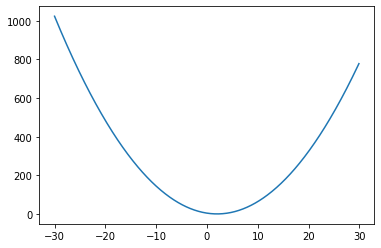

In [2]:
fig,ax=plt.subplots(1,1)
xlist = np.arange(-30, 30, 0.1)
ylist = function1D(xlist)
# Plot the funtion
ax.plot(xlist,function1D(xlist))
plt.show()

# Plot again but with the path of the minima search

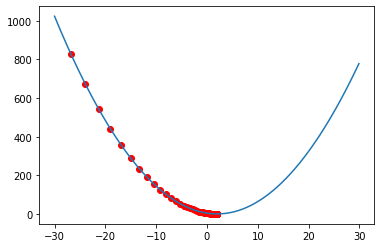

In [3]:
fig,ax=plt.subplots(1,1)
xlist = np.arange(-30, 30, 0.1)
ylist = function1D(xlist)
# Plot the funtion
ax.plot(xlist,function1D(xlist))
# Plot the history of the minima search
ax.scatter(XHistory,function1D(XHistory), color='r')
plt.show()

***
# Find the minima of a 2D function

In [4]:

# Function to minimize
def function ( XY ):
   return (XY[0]-2)**2 + 2*(XY[1]-3)**2

# Gradient of the function
def gradient (XY):
    return np.array([ 2*XY[0]-4 , 4*XY[1]-12 ])

# Numerical gradient
def numerical_gradient (XY, fn, delta):
    deltax = np.array([delta,0])
    deltay = np.array([0,delta])
    X_plus  = fn( XY + deltax)
    X_minus = fn( XY - deltax)
    Y_plus  = fn( XY + deltay)
    Y_minus = fn( XY - deltay)
    return np.array ([ X_plus - X_minus, Y_plus - Y_minus])
    

# Starting point
XY = np.array([-30,-20])

# Step size multiplier
alpha=0.5

# Gradient descent (200 steps)
for x in range(0, 200):
    XY = XY - alpha*numerical_gradient(XY,function,0.05)
    #print (XY)

# Print results
print ('XY=', XY)
print ('f=', function(XY))

# Output expected:
# XY= [2.00000002 3.        ]
# f= 3.9022927947211357e-16

XY= [1.99999998 3.        ]
f= 5.096872135740547e-16


# Plot the 2D plane of a simple function

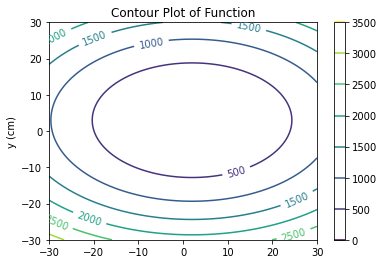

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def DrawFunction( fn , range ):
    xlist = np.linspace(-range, range, 300)
    ylist = np.linspace(-range, range, 300)
    X, Y = np.meshgrid(xlist, ylist)
    Z = fn(np.array([X, Y]))
    fig,ax=plt.subplots(1,1)
    cp = ax.contour(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Plot of Function')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    return fig, cp

myFig, ContourPlot = DrawFunction(function,30)
myFig.show()

# Plot the path of decent for a simple function

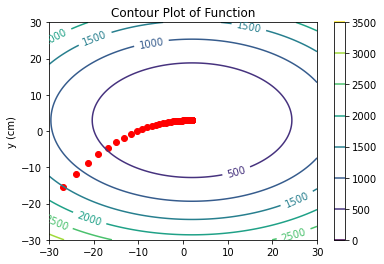

In [6]:
fig, cp = DrawFunction(function,30)

# Starting point
XY = np.array([-30,-20])

# Step size multiplier
alpha=0.5

# Number of steps to take
steps = 200

# Gradient descent (200 steps)
XYHistory = np.zeros( (steps,2 ))
for x in range(0, 200):
    XY = XY - alpha*numerical_gradient(XY,function,0.05)
    XYHistory[x] = XY
    #print (XY)

#print (XYHistory)

plt.scatter(XYHistory[:,0], XYHistory[:,1], color='r')
plt.show()

***
# Define and draw a more complex function with multiple local minima

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.contour.QuadContourSet at 0x14ec003a94c0>)

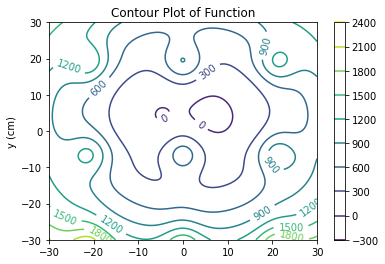

In [7]:
# Fancy function
def function2 ( XY ):
   return 100*np.exp(np.cos(0.30*XY[0]) -np.sin(0.25*XY[1]))-100 +(XY[0]-2)**2 + 1*(XY[1]-3)**2

DrawFunction(function2,30)

# Find the minima through gradient decent, note how this starting location and step size doesn't give us the lowest minima

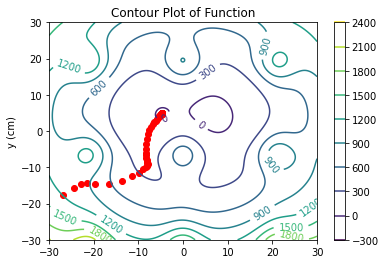

XY= [-4.7286757   4.90980972]
f= 52.56982302035789


In [8]:
DrawFunction(function2,30)

# Starting point
XY = np.array([-30,-20])

# Step size multiplier
alpha=0.5

# Number of steps to take
steps = 200

# Gradient descent (200 steps)
XYHistory = np.zeros( (steps,2 ))
for x in range(0, steps):
    XY = XY - alpha*numerical_gradient(XY,function2,0.05)
    XYHistory[x] = XY
    #print (XY)

#print (XYHistory)

plt.scatter(XYHistory[:,0], XYHistory[:,1], color='r')
plt.show()


# Print results
print ('XY=', XY)
print ('f=', function(XY))

# Repeat above but add momentum like term with some damping... now the gradient decent can find a new minima

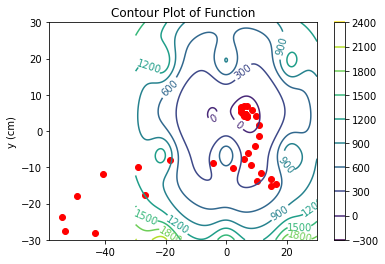

XY= [6.26015668 4.55749924]
f= 23.000542647600057


In [9]:
DrawFunction(function2,30)

# Starting point
XY = np.array([-30,-20])

# Step size multiplier
alpha=0.5

# Number of steps to take
steps = 200

# Gradient descent (200 steps)
XYHistory = np.zeros( (steps,2 ))
Velocity = 0
for x in range(0, steps):
    XY = XY - alpha*numerical_gradient(XY,function2,0.05) + Velocity* 0.7
    XYHistory[x] = XY
    Velocity = XYHistory[x] - XYHistory[x - 1]
    #print (XY)

#print (XYHistory)

plt.scatter(XYHistory[:,0], XYHistory[:,1], color='r')
plt.show()


# Print results
print ('XY=', XY)
print ('f=', function(XY))